In [91]:
import pandas as pd 
import numpy as np 
import random as rand
import json
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
# !pip install folium
import folium
pd.set_option('display.max_columns', None)
from scipy.spatial.distance import cdist 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.utils import resample
import seaborn as sns

In [30]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_920ecb38d3f84f59805be4de497ed302 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='azrOCbk0Rvqa35w-OuXQeZrAoEW3iY7UDvMiDeD91_Cw',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_920ecb38d3f84f59805be4de497ed302.get_object(Bucket='clusteringneighborhoods-donotdelete-pr-oebmgv9ks73cli',Key='census_block_loc.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()

body = client_920ecb38d3f84f59805be4de497ed302.get_object(Bucket='clusteringneighborhoods-donotdelete-pr-oebmgv9ks73cli',Key='nyc_census_tracts.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_2 = pd.read_csv(body)
df_data_2.head()

,CensusTract,County,Borough,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Citizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,36005000100,Bronx,Bronx,7703,7133,570,29.9,6.1,60.9,0.2,1.6,6476,NaN,NaN,2440.0,373.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
1,36005000200,Bronx,Bronx,5403,2659,2744,75.8,2.3,16.0,0.0,4.2,3639,72034.0,13991.0,22180.0,2206.0,20.0,20.7,28.7,17.1,23.9,8.0,22.3,44.8,13.7,38.6,2.9,0.0,0.0,43.0,2308,80.8,16.2,2.9,0.0,7.7
2,36005000400,Bronx,Bronx,5915,2896,3019,62.7,3.6,30.7,0.0,0.3,4100,74836.0,8407.0,27700.0,2449.0,13.2,23.6,32.2,23.4,24.9,9.0,10.5,41.3,10.0,44.6,1.4,0.5,2.1,45.0,2675,71.7,25.3,2.5,0.6,9.5
3,36005001600,Bronx,Bronx,5879,2558,3321,65.1,1.6,32.4,0.0,0.0,3536,32312.0,6859.0,17526.0,2945.0,26.3,35.9,19.1,36.1,26.2,4.9,13.8,37.2,5.3,45.5,8.6,1.6,1.7,38.8,2120,75.0,21.3,3.8,0.0,8.7
4,36005001900,Bronx,Bronx,2591,1206,1385,55.4,9.0,29.0,0.0,2.1,1557,37936.0,3771.0,17986.0,2692.0,37.1,31.5,35.4,20.9,26.2,6.6,11.0,19.2,5.3,63.9,3.0,2.4,6.2,45.4,1083,76.8,15.5,7.7,0.0,19.2


In [31]:
coor = df_data_1 
dem = df_data_2 



In [32]:
dem['CensusTract'] = dem.CensusTract.astype('str').str[5:11]
dem.head()

,CensusTract,County,Borough,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Citizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,000100,Bronx,Bronx,7703,7133,570,29.9,6.1,60.9,0.2,1.6,6476,NaN,NaN,2440.0,373.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
1,000200,Bronx,Bronx,5403,2659,2744,75.8,2.3,16.0,0.0,4.2,3639,72034.0,13991.0,22180.0,2206.0,20.0,20.7,28.7,17.1,23.9,8.0,22.3,44.8,13.7,38.6,2.9,0.0,0.0,43.0,2308,80.8,16.2,2.9,0.0,7.7
2,000400,Bronx,Bronx,5915,2896,3019,62.7,3.6,30.7,0.0,0.3,4100,74836.0,8407.0,27700.0,2449.0,13.2,23.6,32.2,23.4,24.9,9.0,10.5,41.3,10.0,44.6,1.4,0.5,2.1,45.0,2675,71.7,25.3,2.5,0.6,9.5
3,001600,Bronx,Bronx,5879,2558,3321,65.1,1.6,32.4,0.0,0.0,3536,32312.0,6859.0,17526.0,2945.0,26.3,35.9,19.1,36.1,26.2,4.9,13.8,37.2,5.3,45.5,8.6,1.6,1.7,38.8,2120,75.0,21.3,3.8,0.0,8.7
4,001900,Bronx,Bronx,2591,1206,1385,55.4,9.0,29.0,0.0,2.1,1557,37936.0,3771.0,17986.0,2692.0,37.1,31.5,35.4,20.9,26.2,6.6,11.0,19.2,5.3,63.9,3.0,2.4,6.2,45.4,1083,76.8,15.5,7.7,0.0,19.2


In [33]:
coor['CensusTract'] = coor['BlockCode'].astype('str').str[5:11]
coor.head()

,Latitude,Longitude,BlockCode,County,State,CensusTract
0,40.48,-74.280000,340230076002012,Middlesex,NJ,007600
1,40.48,-74.276834,340230076005000,Middlesex,NJ,007600
2,40.48,-74.273668,340230076003018,Middlesex,NJ,007600
3,40.48,-74.270503,340230076003004,Middlesex,NJ,007600
4,40.48,-74.267337,340230074021000,Middlesex,NJ,007402


In [34]:
joined = pd.merge(dem,coor,on = 'CensusTract')
joined = joined[joined.State == 'NY']

In [35]:
random_df = pd.DataFrame()
for i in joined['CensusTract'].unique():
    df = joined[joined['CensusTract'] == i]
    num = rand.randint(0,len(df)-1)
    random_df = random_df.append(df.iloc[num,:])


In [41]:
random_df.columns []

Index(['Asian', 'Black', 'BlockCode', 'Borough', 'Carpool', 'CensusTract',
       'ChildPoverty', 'Citizen', 'Construction', 'County_x', 'County_y',
       'Drive', 'Employed', 'FamilyWork', 'Hispanic', 'Income', 'IncomeErr',
       'IncomePerCap', 'IncomePerCapErr', 'Latitude', 'Longitude',
       'MeanCommute', 'Men', 'Native', 'Office', 'OtherTransp', 'Poverty',
       'PrivateWork', 'Production', 'Professional', 'PublicWork',
       'SelfEmployed', 'Service', 'State', 'TotalPop', 'Transit',
       'Unemployment', 'Walk', 'White', 'Women', 'WorkAtHome'],
      dtype='object')

In [36]:
random_df.head()

,Asian,Black,BlockCode,Borough,Carpool,CensusTract,ChildPoverty,Citizen,Construction,County_x,County_y,Drive,Employed,FamilyWork,Hispanic,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Latitude,Longitude,MeanCommute,Men,Native,Office,OtherTransp,Poverty,PrivateWork,Production,Professional,PublicWork,SelfEmployed,Service,State,TotalPop,Transit,Unemployment,Walk,White,Women,WorkAtHome
278,21.1,5.5,3.608100e+14,Queens,0.6,000100,2.5,4126.0,1.0,Queens,Queens,14.1,4205.0,0.0,6.0,127807.0,12982.0,78858.0,7494.0,40.751357,-73.953920,30.7,3322.0,0.0,17.2,0.8,11.4,88.8,1.3,75.4,7.0,4.2,5.1,NY,6403.0,78.5,3.5,2.8,61.5,3081.0,3.2
345,4.2,16.0,3.608100e+14,Bronx,13.7,000200,20.7,3639.0,8.0,Bronx,Queens,44.8,2308.0,0.0,75.8,72034.0,13991.0,22180.0,2206.0,40.694824,-73.865276,43.0,2659.0,0.0,23.9,0.0,20.0,80.8,22.3,28.7,16.2,2.9,17.1,NY,5403.0,38.6,7.7,2.9,2.3,2744.0,0.0
524,24.1,5.4,3.600500e+14,Queens,0.8,000400,19.5,2519.0,5.9,Queens,Bronx,20.6,2149.0,0.0,58.9,54773.0,11571.0,21186.0,3030.0,40.810151,-73.849447,48.4,2146.0,1.4,25.6,0.0,13.3,89.8,13.5,20.8,8.5,1.7,34.2,NY,4559.0,74.5,5.7,1.6,9.3,2413.0,2.6
534,0.0,32.4,3.606100e+14,Bronx,5.3,001600,35.9,3536.0,4.9,Bronx,New York,37.2,2120.0,0.0,65.1,32312.0,6859.0,17526.0,2945.0,40.715176,-73.995075,38.8,2558.0,0.0,26.2,1.6,26.3,75.0,13.8,19.1,21.3,3.8,36.1,NY,5879.0,45.5,8.7,8.6,1.6,3321.0,1.7
622,2.1,29.0,3.600500e+14,Bronx,5.3,001900,31.5,1557.0,6.6,Bronx,Bronx,19.2,1083.0,0.0,55.4,37936.0,3771.0,17986.0,2692.0,40.798844,-73.912764,45.4,1206.0,0.0,26.2,2.4,37.1,76.8,11.0,35.4,15.5,7.7,20.9,NY,2591.0,63.9,19.2,3.0,9.0,1385.0,6.2


In [37]:
cluster_df = random_df[['Asian','Black','Borough',
       'ChildPoverty', 'Citizen', 'County_x', 'County_y',
     'Employed', 'Hispanic', 'Income', 'IncomeErr',
       'IncomePerCap', 'IncomePerCapErr',
       'MeanCommute', 'Men', 'Native', 'Poverty',
       'PrivateWork', 'Professional', 'PublicWork',
       'SelfEmployed', 'TotalPop', 
       'Unemployment', 'White', 'Women']]

In [38]:
for col in cluster_df.columns:
    if cluster_df[col].dtype == 'float64':
        cluster_df[col].fillna(cluster_df[col].mean(), inplace = True)
    

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [39]:
cluster_df.isna().sum()

Asian              0
Black              0
Borough            0
ChildPoverty       0
Citizen            0
County_x           0
County_y           0
Employed           0
Hispanic           0
Income             0
IncomeErr          0
IncomePerCap       0
IncomePerCapErr    0
MeanCommute        0
Men                0
Native             0
Poverty            0
PrivateWork        0
Professional       0
PublicWork         0
SelfEmployed       0
TotalPop           0
Unemployment       0
White              0
Women              0
dtype: int64

In [40]:
cluster_df.dtypes

Asian              float64
Black              float64
Borough             object
ChildPoverty       float64
Citizen            float64
County_x            object
County_y            object
Employed           float64
Hispanic           float64
Income             float64
IncomeErr          float64
IncomePerCap       float64
IncomePerCapErr    float64
MeanCommute        float64
Men                float64
Native             float64
Poverty            float64
PrivateWork        float64
Professional       float64
PublicWork         float64
SelfEmployed       float64
TotalPop           float64
Unemployment       float64
White              float64
Women              float64
dtype: object

In [14]:
cluster_df = pd.get_dummies(cluster_df, prefix = ['Borough','County_X','County_Y'])

In [15]:
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(cluster_df) 
    kmeanModel.fit(cluster_df)     
      
    distortions.append(sum(np.min(cdist(cluster_df, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / cluster_df.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(cluster_df, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / cluster_df.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

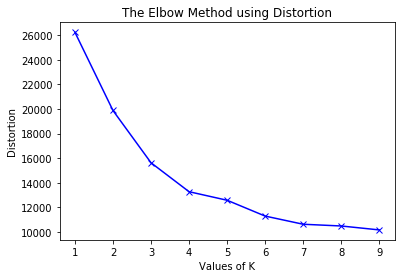

In [16]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show()

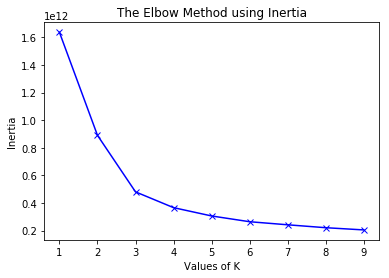

In [17]:
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()

In [18]:
clusters = 3
kmod = KMeans(n_clusters = clusters, random_state = 0).fit(cluster_df)
kmod.labels_

array([0, 0, 0, ..., 0, 2, 2], dtype=int32)

In [19]:
pd.Series(kmod.labels_).value_counts()

2    643
0    623
1     60
dtype: int64

In [20]:
visual_df = random_df[['Latitude','Longitude']]
visual_df['Cluster'] = kmod.labels_

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [24]:
cluster0 = visual_df[visual_df['Cluster'] == 0]
cluster1 = visual_df[visual_df['Cluster'] == 1]
cluster2 = visual_df[visual_df['Cluster'] == 2]

cluster_0ds = resample(cluster0, replace = False,n_samples = 60,random_state = 1)
cluster_1ds = resample(cluster1, replace = False,n_samples = 60,random_state = 1)
cluster_2ds = resample(cluster2, replace = False,n_samples = 60,random_state = 1)

df_downsampled = pd.concat([cluster_0ds, cluster_1ds,cluster_2ds])
visual_df = df_downsampled

In [25]:
##4 clusters
# cluster0 = visual_df[visual_df['Cluster'] == 0]
# cluster1 = visual_df[visual_df['Cluster'] == 1]
# cluster2 = visual_df[visual_df['Cluster'] == 2]
# cluster3 = visual_df[visual_df['Cluster'] == 3]


# cluster_0ds = resample(cluster0, replace = False,n_samples = 62,random_state = 1)
# cluster_1ds = resample(cluster1, replace = False,n_samples = 62,random_state = 1)
# cluster_2ds = resample(cluster2, replace = False,n_samples = 62,random_state = 1)
# cluster_3ds = resample(cluster3, replace = False,n_samples = 62,random_state = 1)


# df_downsampled = pd.concat([cluster_0ds, cluster_1ds,cluster_2ds,cluster_3ds])
# visual_df = df_downsampled

In [26]:
visual_df.Cluster.value_counts()

2    60
1    60
0    60
Name: Cluster, dtype: int64

In [27]:
address = 'New York, New York'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 40.7127281, -74.0060152.


In [28]:

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(clusters)
ys = [i + x + (i*x)**2 for i in range(clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, cluster in zip(visual_df['Latitude'], visual_df['Longitude'], visual_df['Cluster']):
    label = folium.Popup(' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [70]:
cluster_df['cluster'] = kmod.labels_

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [88]:
#red cluster 0
#purple cluster 1
#Turquoise cluster 2 

mean = [
        cluster_df[cluster_df['cluster'] == 0]['Income'].mean(),
        cluster_df[cluster_df['cluster'] == 1]['Income'].mean(),
        cluster_df[cluster_df['cluster'] == 2]['Income'].mean()
]
        
std = [
        cluster_df[cluster_df['cluster'] == 0]['Income'].std(),
        cluster_df[cluster_df['cluster'] == 1]['Income'].std(),
        cluster_df[cluster_df['cluster'] == 2]['Income'].std()
]

maximum = [
        cluster_df[cluster_df['cluster'] == 0]['Income'].max(),
        cluster_df[cluster_df['cluster'] == 1]['Income'].max(),
        cluster_df[cluster_df['cluster'] == 2]['Income'].max()
]

minimum = [
        cluster_df[cluster_df['cluster'] == 0]['Income'].min(),
        cluster_df[cluster_df['cluster'] == 1]['Income'].min(),
        cluster_df[cluster_df['cluster'] == 2]['Income'].min()
]
        
clusts = ['Red','Purple','Turquoise']
cols = ['Cluster','Mean','Standard Deviation','Maximum','Minimum']
income_df = pd.DataFrame([clusts, mean,std,maximum,minimum]).transpose()
income_df.columns = cols
income_df

,Cluster,Mean,Standard Deviation,Maximum,Minimum
0,Red,70654,18126,150833,11011
1,Purple,105863,44969.6,222222,20849
2,Turquoise,41678.9,16384,144293,9829


In [121]:
Asian = [
        cluster_df[cluster_df['cluster'] == 0]['Asian'].mean(),
        cluster_df[cluster_df['cluster'] == 1]['Asian'].mean(),
        cluster_df[cluster_df['cluster'] == 2]['Asian'].mean()
]

Black = [
        cluster_df[cluster_df['cluster'] == 0]['Black'].mean(),
        cluster_df[cluster_df['cluster'] == 1]['Black'].mean(),
        cluster_df[cluster_df['cluster'] == 2]['Black'].mean()
]


Hispanic = [
        cluster_df[cluster_df['cluster'] == 0]['Hispanic'].mean(),
        cluster_df[cluster_df['cluster'] == 1]['Hispanic'].mean(),
        cluster_df[cluster_df['cluster'] == 2]['Hispanic'].mean()
]

Native = [
        cluster_df[cluster_df['cluster'] == 0]['Native'].mean(),
        cluster_df[cluster_df['cluster'] == 1]['Native'].mean(),
        cluster_df[cluster_df['cluster'] == 2]['Native'].mean()
]

White = [
        cluster_df[cluster_df['cluster'] == 0]['White'].mean(),
        cluster_df[cluster_df['cluster'] == 1]['White'].mean(),
        cluster_df[cluster_df['cluster'] == 2]['White'].mean()
]


race = pd.DataFrame([Asian,Black,Hispanic,Native,White]).transpose()
race.columns = ['Asian','Black','Hispanic','Native','White']
race

,Asian,Black,Hispanic,Native,White
0,14.743154,22.644099,17.629523,0.151335,42.214922
1,12.561667,6.951667,18.021667,0.131667,59.638333
2,12.837327,30.982718,32.563679,0.240698,21.021198


Text(0.5, 1.0, 'Asian Percentage of Cluster Population')

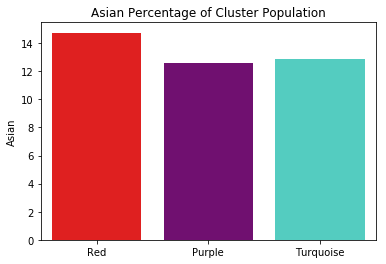

In [142]:
sns.barplot(x = clusts,y = race['Asian'], palette = ['red','purple','turquoise'] ).set_title('Asian Percentage of Cluster Population')


Text(0.5, 1.0, 'Black Percentage of Population')

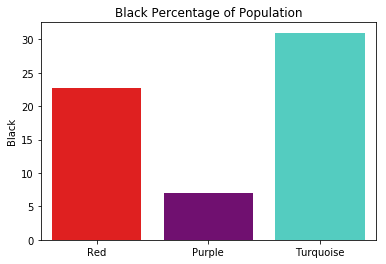

In [145]:
sns.barplot(x = clusts,y = race['Black'], palette = ['red','purple','turquoise'] ).set_title('Black Percentage of Population')


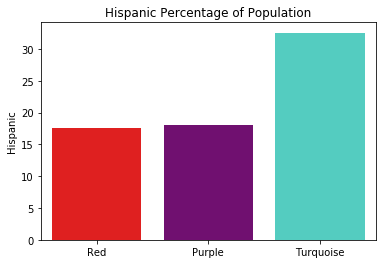

In [124]:
sns.barplot(x = clusts,y = race['Hispanic'], palette = ['red','purple','turquoise'] ).set_title('Hispanic Percentage of Population')
plt.xlabel = clusts
plt.ylabel = 'Percentage'

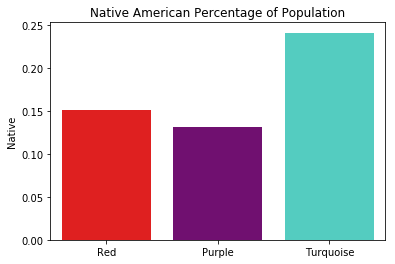

In [125]:
sns.barplot(x = clusts,y = race['Native'], palette = ['red','purple','turquoise'] ).set_title('Native American Percentage of Population')
plt.xlabel = clusts
plt.ylabel = 'Percentage'

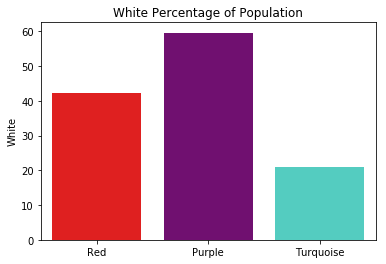

In [126]:
sns.barplot(x = clusts,y = race['White'], palette = ['red','purple','turquoise'] ).set_title('White Percentage of Population')
plt.xlabel = clusts
plt.ylabel = 'Percentage'